<a href="https://colab.research.google.com/github/Patatone/Analysis-of-the-COVID-19-impact-on-LTE-Networks/blob/main/Analysis_of_the_COVID_19_impact_on_LTE_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import datetime

# Import Data


In [76]:
from google.colab import drive
import glob
import os

# Use this Section to import the data files provided in the project folder.

# NETWORK KPI
# Location: Milan ; Reference month: either January, February or March 2020:

## Google drive required lines
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/MRN_data/'

## Local path required lines
# file_path = ''

# KPIs
# We select January, February and March
all_files = glob.glob(os.path.join(file_path , "Milano_800*.csv"))
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

#data = pd.read_csv(file_path+'Milano_800_January_MRN.csv') # Here January is selected
data = pd.concat(li, axis=0, ignore_index=True)

data.drop(['Unnamed: 0'], axis=1, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

# Cells Location:
locations = pd.read_csv(file_path+'Coordinates_MILANO.csv')

# https://pandas.pydata.org

# This section shows some information regarding the dataset
print(20*'*')
print('Data types:\n')
print(data.dtypes)
print(20*'*')  
print('Number of data points: ', len(data))
print('Number of columns in the dataset: ', len(data.columns))
print(20*'*')
print(data.isnull().sum(axis=0)) # this command show the number of NON valid data points for each column of the dataset:
                                 # a KPI measure for some timestamp can get lost during the storing procedure
print(20*'*')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
********************
Data types:

REGIONE                    object
COMUNE                     object
Date               datetime64[ns]
ECELL_ID                   object
DL_BW                     float64
RRC_S_SR                  float64
RRC_RE_SR                 float64
ERAB_S_SR                 float64
CS_SR                     float64
IntraF_Hout_SR            float64
InterF_Hout_SR            float64
Hin_SR                    float64
DL_VOL                    float64
UL_VOL                    float64
DL_THR_AVG                float64
UL_THR_AVG                float64
DL_THR_MAX                float64
UL_THR_MAX                float64
USERNUM_MAX               float64
PRB_DL_Used_Avg           float64
PRB_UL_Used_Avg           float64
dtype: object
********************
Number of data points:  841085
Number of columns in the dataset:  21
*******************

In [77]:
# Show first lines of Location Dataset
locations.drop_duplicates(subset='ECELL_ID').head()

,ENODEB_ID,ECELL_ID,LONG_X,LAT_Y
0,930b285c764e554f338f671864b30d3941935b00,b7de6cd46e855aaec8e28b26d1767e7a738819db,9.208433,45.445358
1,930b285c764e554f338f671864b30d3941935b00,3821116bcdc789c9d54369ddd58b8e75fafdcb59,9.208433,45.445358
2,930b285c764e554f338f671864b30d3941935b00,9ed9d0f30e21c0218c987496c433e11dd611c9d2,9.208433,45.445358
3,930b285c764e554f338f671864b30d3941935b00,9ba7c2a7f2ae3a32003cd92d0ce82fdd734f1d7f,9.208433,45.445358
4,930b285c764e554f338f671864b30d3941935b00,ce8ca39728288e4065ec86b14e902807327427ff,9.208433,45.445358


In [78]:
# Here you can understand the size of the scenario, 
# i.e., how many cells you are considering.
print('Number of (distinct) cells: ', len(data.drop_duplicates(subset='ECELL_ID')))


Number of (distinct) cells:  398


In [79]:
# Show first lines of KPIs Dataset

data.iloc[:,:5].head()

,REGIONE,COMUNE,Date,ECELL_ID,DL_BW
0,LOMBARDIA,MILANO,2020-03-01 02:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0
1,LOMBARDIA,MILANO,2020-03-01 01:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0
2,LOMBARDIA,MILANO,2020-03-01 15:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0
3,LOMBARDIA,MILANO,2020-03-01 13:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0
4,LOMBARDIA,MILANO,2020-03-01 14:00:00,b7de6cd46e855aaec8e28b26d1767e7a738819db,10.0


# Data Pre-Processing

In [80]:
# We can split the dataset into tree perdios:
# Full lockdown -> from "9th March 2020" to "31th March 2020"(last data)
# Restrictions -> from "16th February 2020" to "9th March 2020"
# Covid free - > from "1 January 2020"(first data) to "16th February 2020"

full_lockdown = data[data['Date'] < pd.Timestamp(year=2020, month=4, day=1, hour = 0, minute =1)]
full_lockdown = full_lockdown[full_lockdown['Date'] > pd.Timestamp(year=2020, month=3, day=8, hour = 23, minute =59)]

restrictions = data[data['Date'] < pd.Timestamp(year=2020, month=3, day=10, hour = 0, minute =1)]
restrictions = restrictions[restrictions['Date'] > pd.Timestamp(year=2020, month=2, day=15, hour = 23, minute =59)]

covid_free = data[data['Date'] < pd.Timestamp(year=2020, month=2, day=17, hour = 0, minute =1)]
covid_free = covid_free[covid_free['Date'] > pd.Timestamp(year=2019, month=12, day=12, hour = 23, minute =59)]

print('Number of full_lockdown data points: ', len(full_lockdown))
print('Number of restrictions data points: ', len(restrictions))
print('Number of covid_free data points: ', len(covid_free))


Number of full_lockdown data points:  208081
Number of restrictions data points:  217267
Number of covid_free data points:  434975


In [81]:
# Usually, it is interesting to recognize weekly trends in access network related KPIs. 
# The idea is to compare, for the considered KPIs, a typical weekly trend (i.e. in our case, before Covid-19 outbreak) 
# with the one happening after the reference phenomenon (i.e., in our case, the Covid-19 outbreak).
# In this section, the period: Monday 13th - Sunday 20th January 2020
#is extracted from raw data, using as key for the dataset the field "Date":

# January
### Here i think there is a prof mistake "day" should be equal to 21
week = data[data['Date'] < pd.Timestamp(year=2020, month=1, day=20, hour = 0, minute =1)]
week = week[week['Date'] > pd.Timestamp(year=2020, month=1, day=12, hour = 23, minute =59)]

week.iloc[:,5:-2].head() # Here only 14 of the 16 KPIs are shown due to visualization space limits

,RRC_S_SR,RRC_RE_SR,ERAB_S_SR,CS_SR,IntraF_Hout_SR,InterF_Hout_SR,Hin_SR,DL_VOL,UL_VOL,DL_THR_AVG,UL_THR_AVG,DL_THR_MAX,UL_THR_MAX,USERNUM_MAX
557283,99.982178,71.428571,99.943675,20098.0,100.000000,98.039216,99.296917,16315960.0,1801176.0,4461.75,466.75,54066.0,14467.0,0.0
557284,99.920582,72.941176,99.958592,27179.0,97.802198,96.244784,100.000000,26234008.0,2869336.0,7194.00,744.50,56065.0,22918.0,0.0
557285,99.856092,85.567010,99.968708,22086.0,100.000000,97.478992,100.000000,19980736.0,2411952.0,5462.50,629.25,50432.0,5110.0,0.0
557286,99.919524,91.799544,99.915218,21857.0,100.000000,97.272727,100.000000,19699512.0,3276264.0,5389.75,864.75,85376.0,8679.0,0.0
557287,99.848892,55.000000,99.913401,21141.0,100.000000,97.690941,100.000000,24225312.0,3523232.0,6638.00,930.00,67311.0,10119.0,0.0


In [82]:
# Typically, daily and night KPIs traces are analysed differently, as network users 
# show very different behaviours depending on the two moments. 
#In this section, the considered weekly data are grouped into Daily (from 6AM to 24 PM) 
# and Night (from 00 AM to 6 AM) Data

# January
week_day = week.set_index('Date').between_time('06:00:00', '23:59:59')
week_night = week.set_index('Date').between_time('00:00:00', '05:59:59')


In [83]:
# Raw data are provided as hourly samples, but it might be intereseting to consider also under-sampled 
# versions of the data. For instance, it is possible to resample the dataset to obtain daily aggregation of KPIs.
# E.g. in this section the KPI reporting the downloaded traffic volume ('DL_VOL') is considered
# for a particular cell ID ('360767189319c367c8a7b4cf84a32a7841b3678f') and related data are aggregated to produce
# Daily statistics:

cell_id = 'c945addeee641c3b7e7098fe8cad5defe032223c' # this is a city center cell
ref_KPI = 'DL_VOL' # KPI to analyse: DL_VOl is expressed in Kilobits

temp = week_day.loc[week_day['ECELL_ID']==cell_id,[ref_KPI]] # reference data

# Extract Statistics
median = temp.resample('D').agg({ref_KPI: np.median})
avg = temp.resample('D').agg({ref_KPI: np.mean})
std = temp.resample('D').agg({ref_KPI: np.std})

daily_stat = pd.DataFrame(index=median.index, columns = ['Median','Average','Standard_Deviaiton'])

daily_stat.Median = median.values
daily_stat.Average = avg.values
daily_stat.Standard_Deviaiton = std.values


daily_stat.head()

# For reference about pandas.DataFrame.resample method, please look at:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html


,Median,Average,Standard_Deviaiton
Date,,,
2020-01-13,16214972.0,1.509998e+07,1.070864e+07
2020-01-14,18374712.0,1.493930e+07,8.941285e+06
2020-01-15,15315368.0,1.324080e+07,8.384022e+06
2020-01-16,9518384.0,1.403120e+07,1.015525e+07
2020-01-17,14755860.0,1.364577e+07,1.030489e+07


# Data Visualization

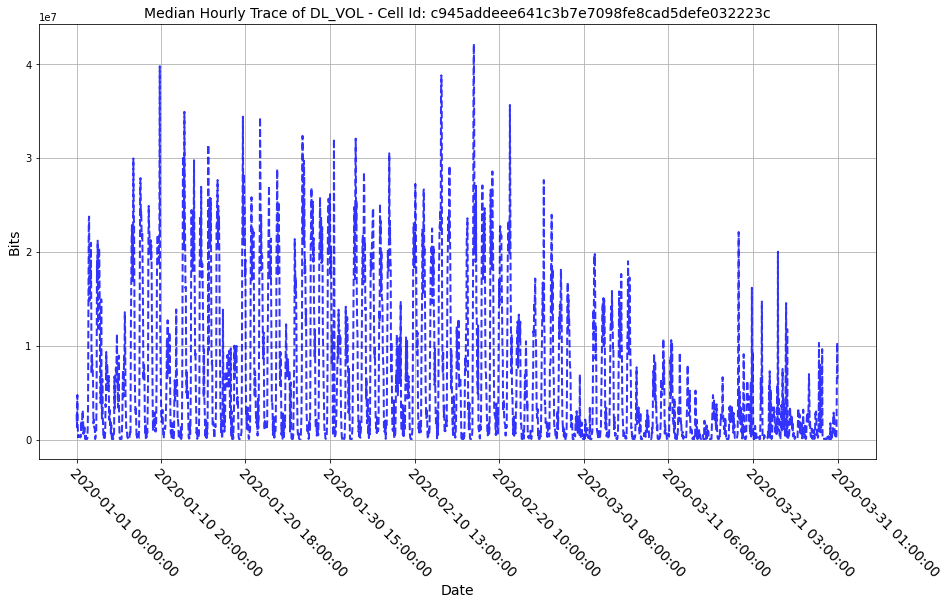

In [84]:
# This section plots the Traffic Downloaded from the considered cell in a month

# Sort hourly samples by date
ref = data.set_index('ECELL_ID').sort_values('Date').loc[cell_id,['Date',ref_KPI]]

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
ax.plot(list(range(0,len(ref))), ref[ref_KPI], linestyle='--', lw=2, color='b', alpha=.8) 

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
ticks_label = ref.reset_index().set_index('Date').sort_values(by='Date').index
#ticks = [0, 191, 359, 503, 671] # indexes of 00.00 timestamp of 1st, 8th, 15th, 22nd and 29th January
ticks = np.linspace(0, len(ref)-1, 10, dtype=int)
plt.xticks(ticks = ticks, labels = ticks_label[ticks], fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Date', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14) # unit of measure depends on the considered KPI
plt.title('Median Hourly Trace of '+ref_KPI+' - Cell Id: %s'%cell_id, fontsize=14)
plt.show()

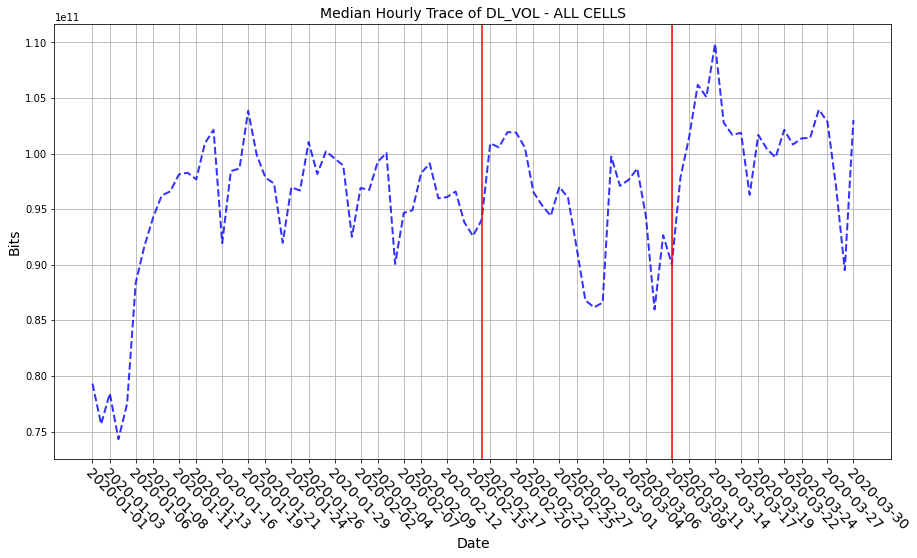

In [85]:
# This section plots the Traffic Downloaded from the ALL cells in a month

# Sort hourly samples by date
# .loc[cell_id,['Date',ref_KPI]] = Set new index to "cell_id" and select Columns by Name "Date" and "ref_KPI"
# ref = data.set_index('ECELL_ID').sort_values('Date').loc[cell_id,['Date',ref_KPI]]


# Create a copy of the original dataset
data_temp = data.copy()

# Set Daily granularity instead of Hourly granularity
data_temp['Date'] = pd.to_datetime(data_temp['Date']).dt.date

# Used to identify days with less measurments
# pd.set_option('display.max_rows', None)
# display(data_temp['Date'].value_counts())

# We drop the data about 31-03-2020 because we are computing daily stats and in this date we have only one measurment for the whole day
ref = data_temp.set_index('Date').sort_values('Date').drop(datetime.date(year=2020,month=3,day=31)).loc[:, [ref_KPI]]

# Sum all the "ref_KPI" values with same "Date"
ref = ref.groupby(level=0).sum()

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
ax.plot(list(range(0,len(ref))), ref[ref_KPI], linestyle='--', lw=2, color='b', alpha=.8) 

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
ticks_label = ref.index
#ticks = [0, 191, 359, 503, 671] # indexes of 00.00 timestamp of 1st, 8th, 15th, 22nd and 29th January
ticks = np.linspace(0, len(ref)-1, 35, dtype=int)
plt.xticks(ticks = ticks, labels = ticks_label[ticks], fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Date', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14) # unit of measure depends on the considered KPI
plt.title('Median Hourly Trace of '+ref_KPI+' - ALL CELLS', fontsize=14)

# Draw a red line when there is a period change
plt.axvline(ticks_label.get_loc(datetime.date(year=2020,month=2,day=16)) ,color = 'r',label = 'Restrictions')
plt.axvline(ticks_label.get_loc(datetime.date(year=2020,month=3,day=9)) ,color = 'r',label = 'Full Lockdown')

plt.show()

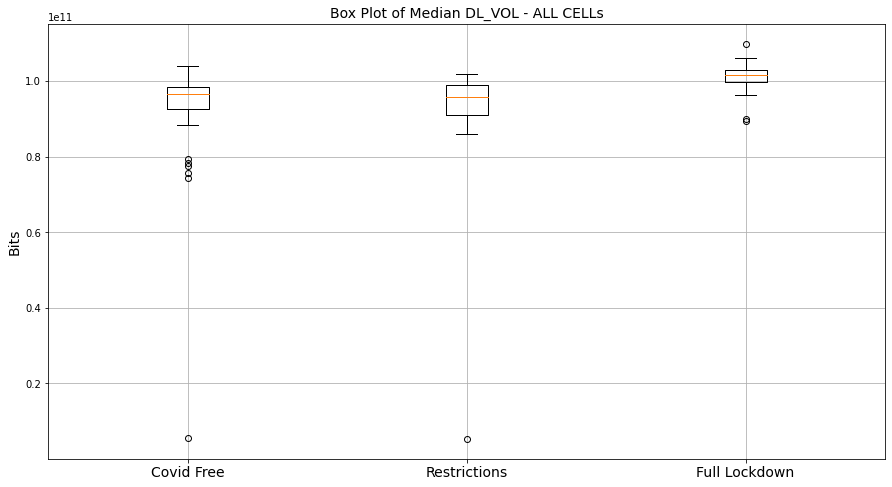

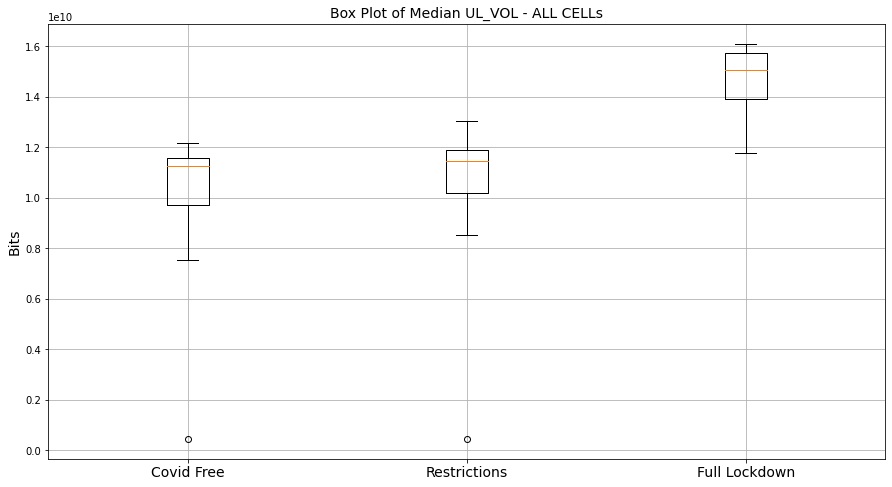

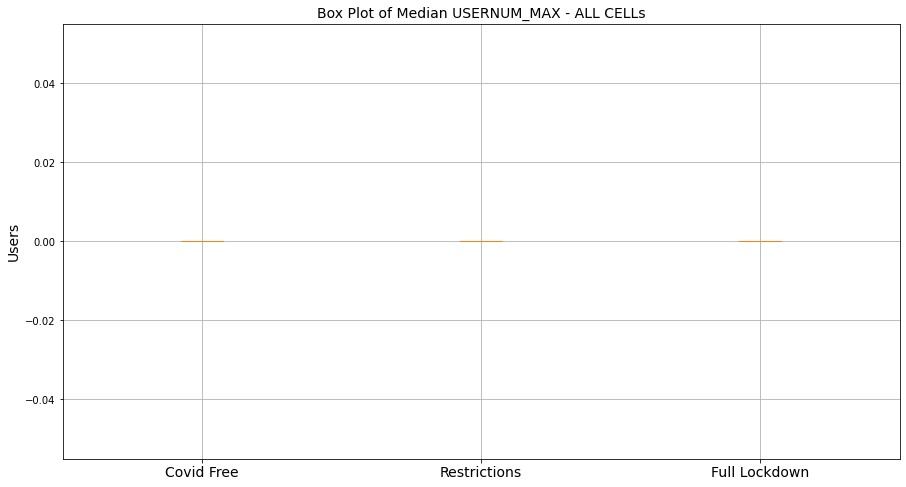

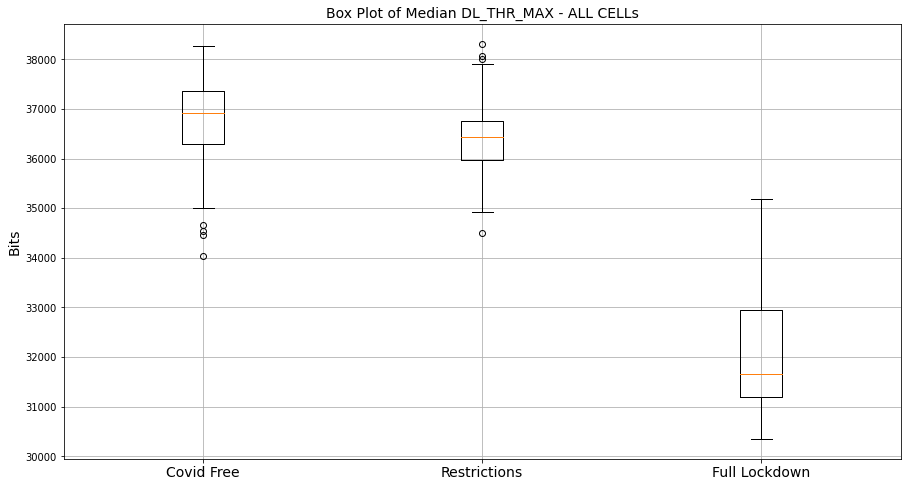

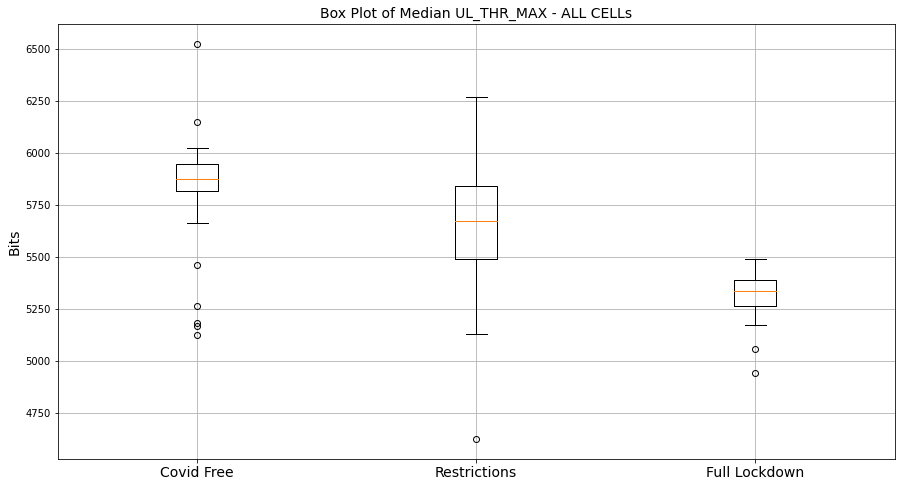

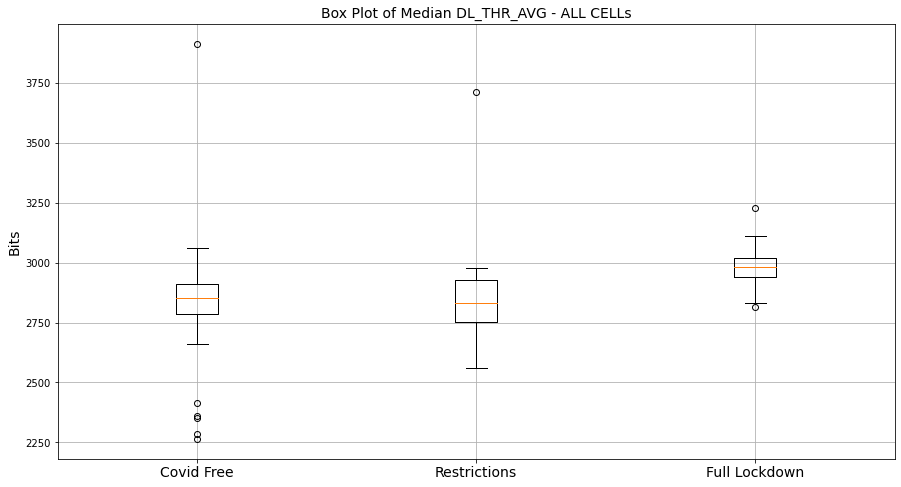

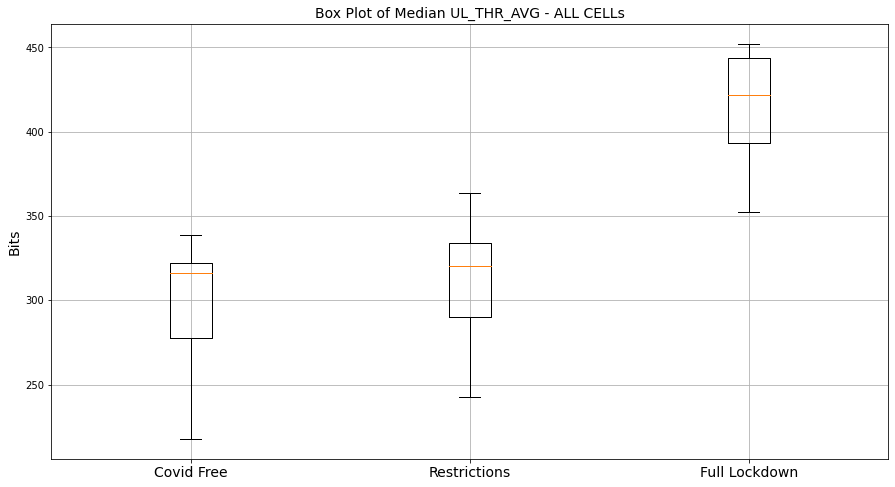

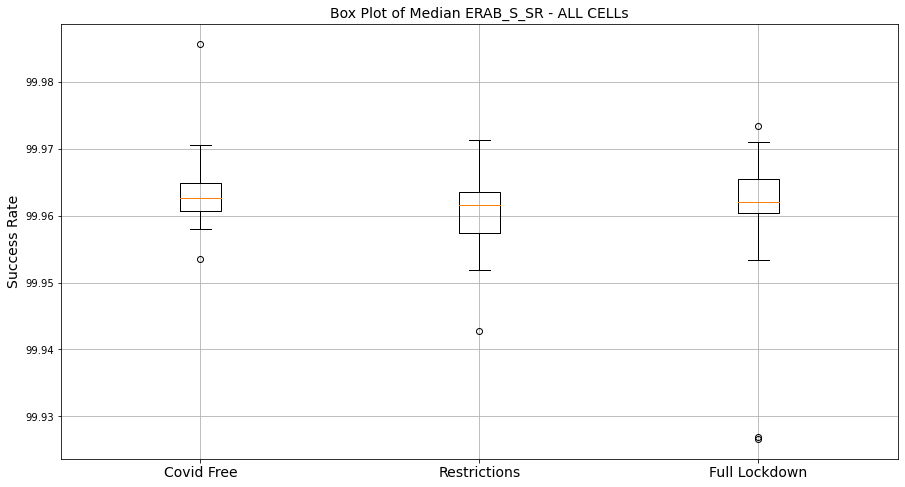

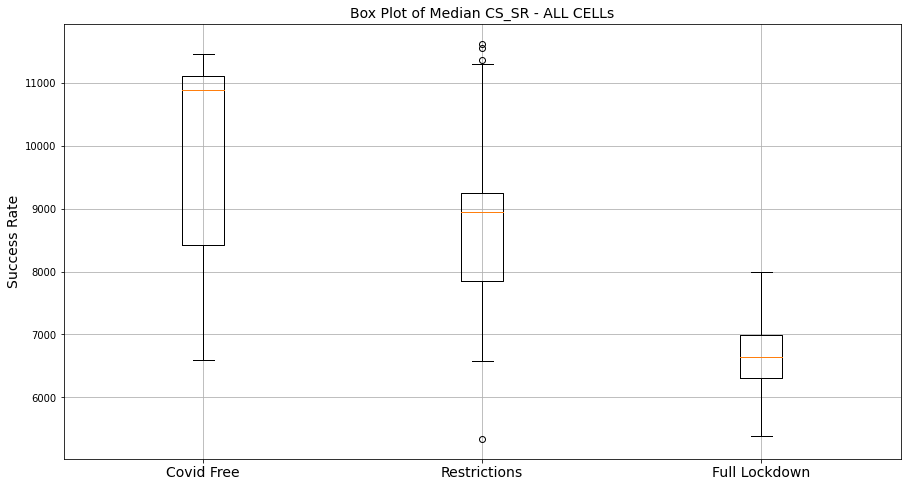

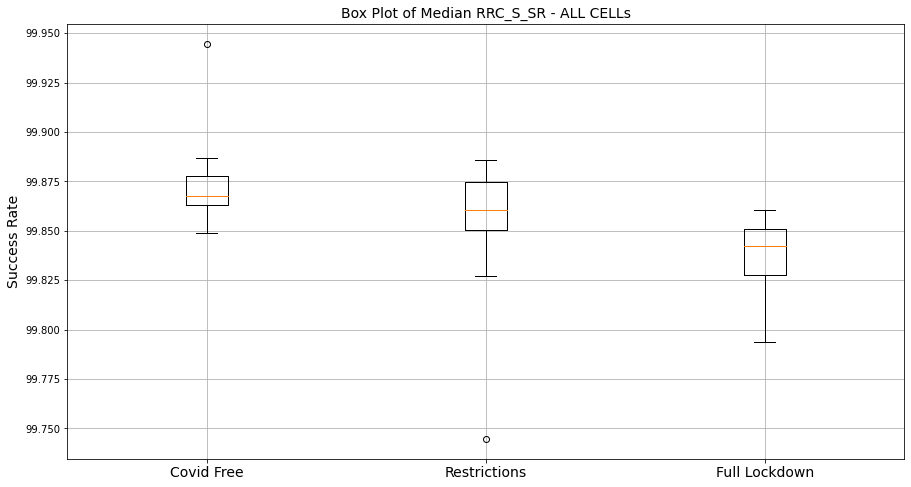

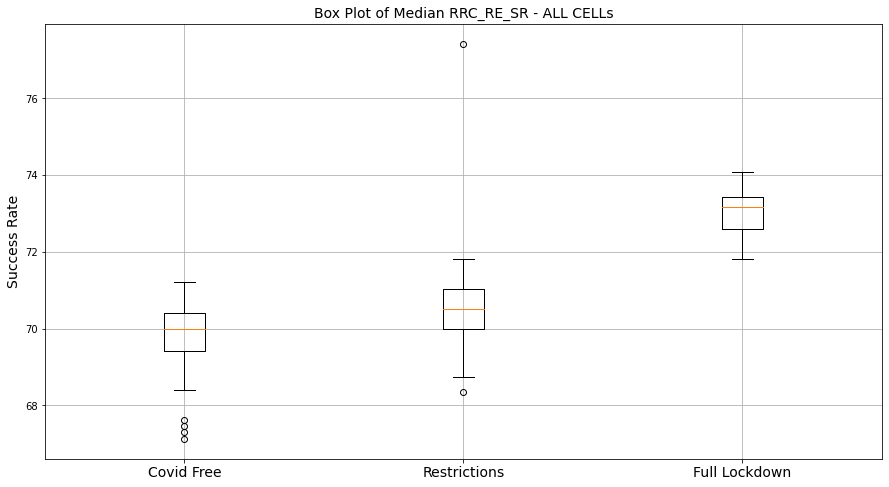

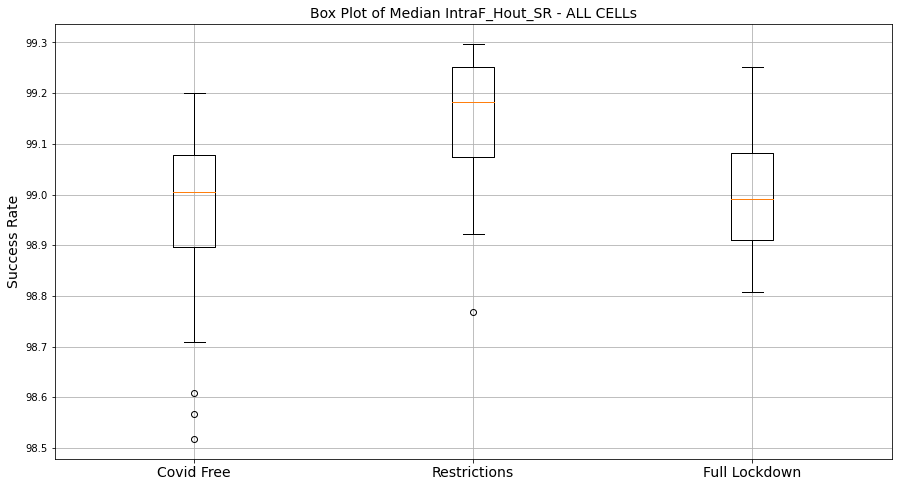

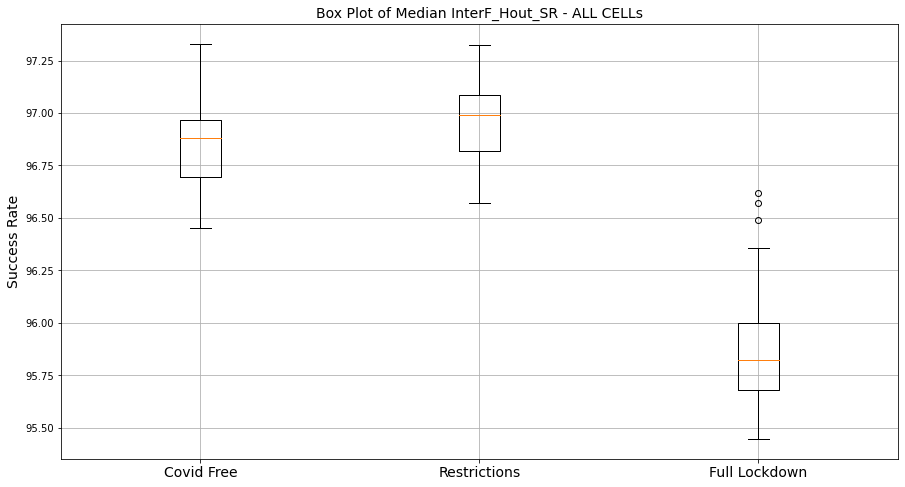

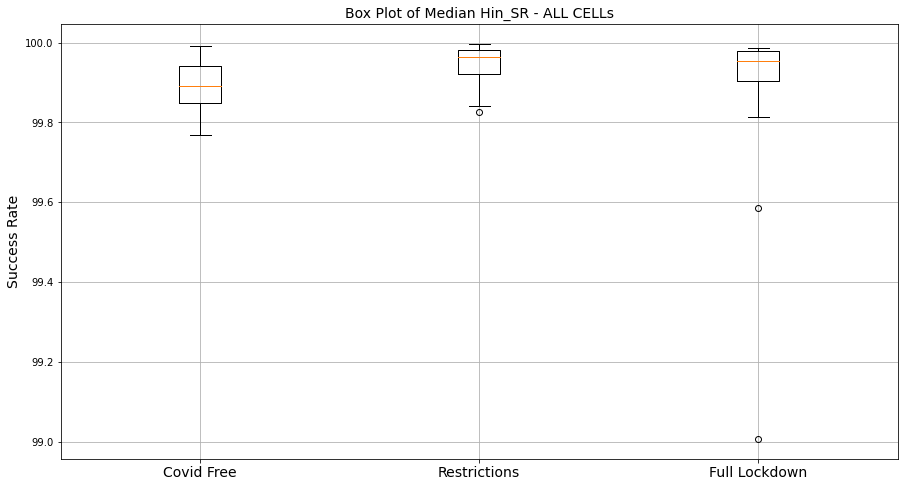

In [86]:
# This section makes a box plot of the daily statiscs regarding the number of connected 
# users to the cell taken as example. For each day, the following statistics are extracted from the considered
# KPI:
# - Median Value
# - 25th and 75th Quantiles
# - Max and Min values

# For reference about how to read a box plot go here: 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

# If operation == 0 do the sum of the ref_KPI of the day
# If operation == 1 do the average of the ref_KPI of the day
def periods_box_plot_daily(ref_KPI, operation, ylabel):
  # Create a copy of the original dataset
  covid_free_temp_1 = covid_free.copy()
  # Set Daily granularity instead of Hourly granularity
  covid_free_temp_1['Date'] = pd.to_datetime(covid_free_temp_1['Date']).dt.date
  # Set new dataset index to "Date" and keep only the "ref_KPI" column
  covid_free_temp_2 = covid_free_temp_1.set_index('Date').sort_values('Date').loc[:, [ref_KPI]]
  
  restrictions_temp_1 = restrictions.copy()
  restrictions_temp_1['Date'] = pd.to_datetime(restrictions_temp_1['Date']).dt.date
  restrictions_temp_2 = restrictions_temp_1.set_index('Date').sort_values('Date').loc[:, [ref_KPI]]
  
  full_lockdown_temp_1 = full_lockdown.copy()
  full_lockdown_temp_1['Date'] = pd.to_datetime(full_lockdown_temp_1['Date']).dt.date
  # We drop the data about 31-03-2020 because we are comuting daily stats and in this date we have only one measurment for the whole day
  full_lockdown_temp_2 = full_lockdown_temp_1.set_index('Date').sort_values('Date').loc[:, [ref_KPI]].drop(datetime.date(year=2020,month=3,day=31))
  

  if operation == 0:
    # Sum all the "ref_KPI" values with same "Date"
    covid_free_temp_2 = covid_free_temp_2.groupby(level=0).sum()
    restrictions_temp_2 = restrictions_temp_2.groupby(level=0).sum()
    full_lockdown_temp_2 = full_lockdown_temp_2.groupby(level=0).sum()
  else:
    # Make the mean of all the "ref_KPI" values with same "Date"
    covid_free_temp_2 = covid_free_temp_2.groupby(level=0).mean()
    restrictions_temp_2 = restrictions_temp_2.groupby(level=0).mean()
    full_lockdown_temp_2 = full_lockdown_temp_2.groupby(level=0).mean()

  # open new figure
  fig, ax = plt.subplots(figsize=(15,8))
  
  ax.boxplot(covid_free_temp_2[ref_KPI].tolist(), positions = [0])
  ax.boxplot(restrictions_temp_2[ref_KPI].tolist(), positions = [1])
  ax.boxplot(full_lockdown_temp_2[ref_KPI].tolist(), positions = [2])
  
  # Set plotting options
  plt.xticks(color='black')
  plt.yticks(color='black')
  plt.grid(1)
  plt.xticks(ticks = list(range(3)), labels = ['Covid Free','Restrictions','Full Lockdown'], fontsize = 14)
  plt.setp( ax.xaxis.get_majorticklabels(), ha="center") 
  plt.ylabel(ylabel, color='black', fontsize=14)
  plt.title('Box Plot of Median '+ref_KPI+' - ALL CELLs', fontsize=14)
  plt.show()
  
periods_box_plot_daily('DL_VOL', 0, 'Bits')
print()
periods_box_plot_daily('UL_VOL', 0, 'Bits')
print()
periods_box_plot_daily('USERNUM_MAX', 1, 'Users')
print()
periods_box_plot_daily('DL_THR_MAX', 1, 'Bits')
print()
periods_box_plot_daily('UL_THR_MAX', 1, 'Bits')
print()
periods_box_plot_daily('DL_THR_AVG', 1, 'Bits')
print()
periods_box_plot_daily('UL_THR_AVG', 1, 'Bits')
print()
periods_box_plot_daily('ERAB_S_SR', 1, 'Success Rate')
print()
periods_box_plot_daily('CS_SR', 1, 'Success Rate')
print()
periods_box_plot_daily('RRC_S_SR', 1, 'Success Rate')
print()
periods_box_plot_daily('RRC_RE_SR', 1, 'Success Rate')
print()
periods_box_plot_daily('IntraF_Hout_SR', 1, 'Success Rate')
print()
periods_box_plot_daily('InterF_Hout_SR', 1, 'Success Rate')
print()
periods_box_plot_daily('Hin_SR', 1, 'Success Rate')


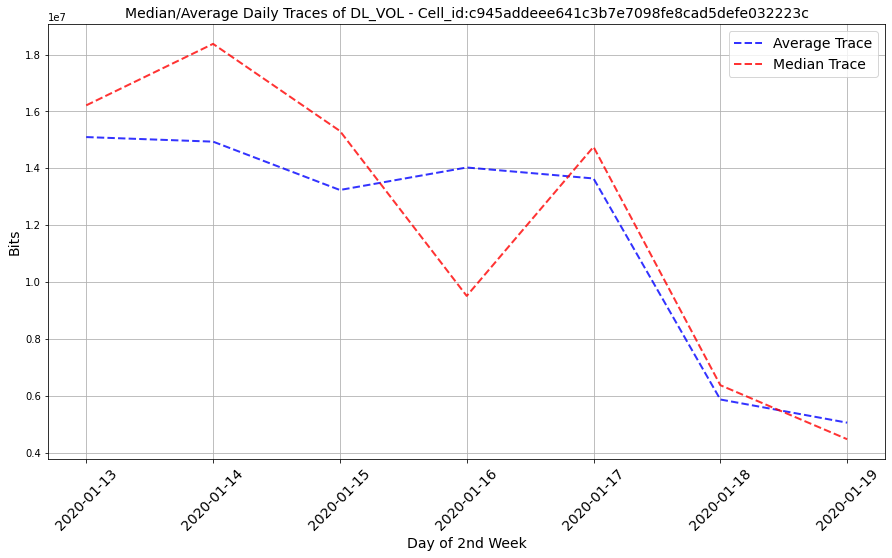

In [87]:
# This section plots the average/median daily data volume downloaded from the 
# cell taken as example in the period: Monday 13th - Sunday 20th January 2020 

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
# The average is calculated by adding up all of the individual values and dividing this total by the number of observations. 
ax.plot(list(range(1,len(daily_stat)+1)),daily_stat['Average'], linestyle='--', lw=2, color='b',label='Average Trace', alpha=.8) 
# The median is calculated by taking the “middle” value, the value for which half of the observations are larger and half are smaller.
ax.plot(list(range(1,len(daily_stat)+1)),daily_stat['Median'], linestyle='--', lw=2, color='r',label='Median Trace', alpha=.8) 


# Set plotting option
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
plt.xticks(ticks = range(1,len(daily_stat)+1) ,labels = list(daily_stat.index.date), fontsize = 14, rotation=45)
plt.xlabel('Day of 2nd Week', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.title('Median/Average Daily Traces of '+ref_KPI+' - Cell_id:%s'%cell_id, fontsize=14)
plt.show()

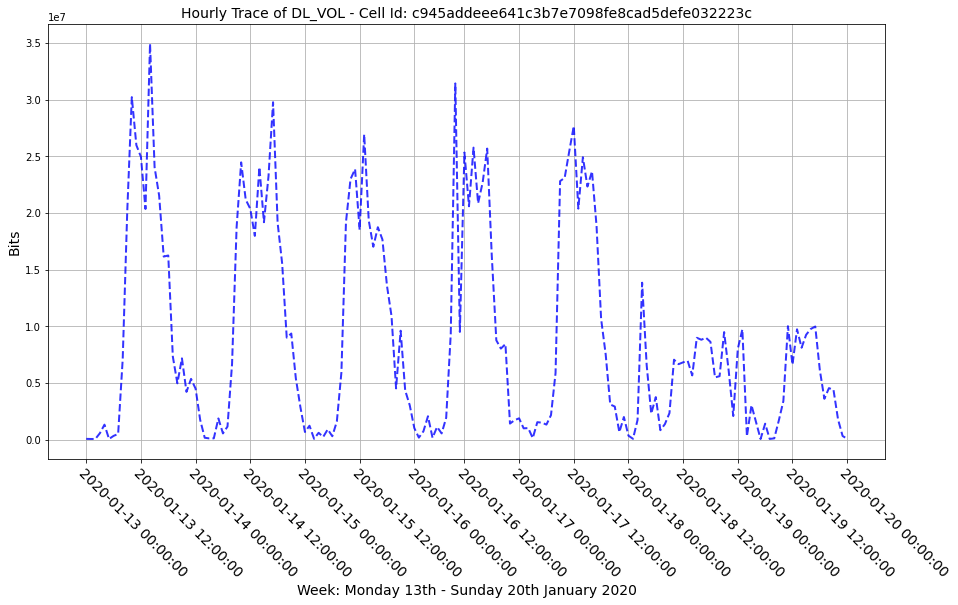

In [88]:
# This section plots the DL Traffic served by cell taken as example in the 
# period: Monday 13th - Sunday 20th January 2020 (not the MWS but just the 
# traffic observed during the selected week)

# Sort hourly samples by date
ref = week.set_index('ECELL_ID').sort_values('Date').loc[cell_id,['Date',ref_KPI]]

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# plot data
ax.plot(list(range(0,len(ref))),ref[ref_KPI], linestyle='--', lw=2, color='b', alpha=.8) 

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
ticks_label = ref.reset_index().set_index('Date').sort_values(by='Date').index
ticks = [0, 12, 24, 36, 48, 60, 72, 83, 95, 107, 119, 131, 143, 155, 167] # indexes of 00.00 and 12.00 timestamps of each week day
plt.xticks(ticks = ticks,labels = ticks_label[ticks],fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Week: Monday 13th - Sunday 20th January 2020', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14) # unit of measure depends on the considered KPI
plt.title('Hourly Trace of '+ref_KPI+' - Cell Id: %s'%cell_id, fontsize=14)
plt.show()

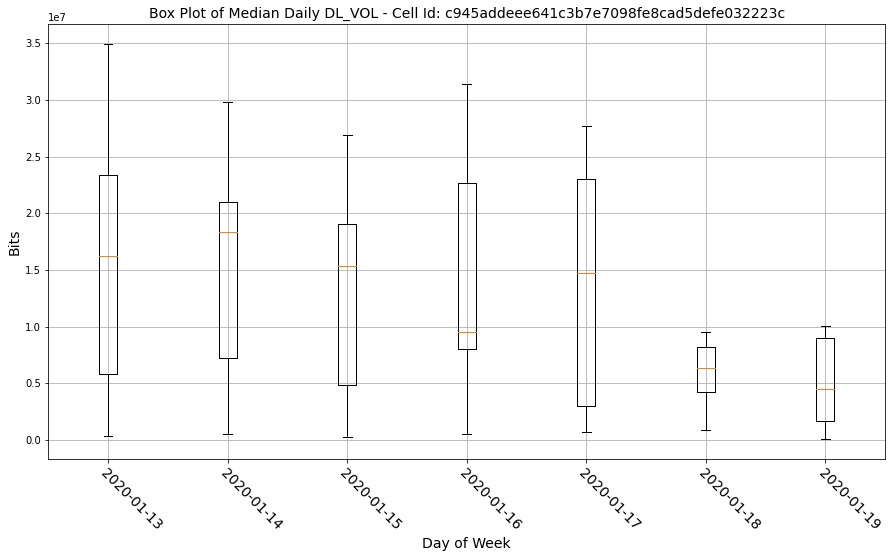

In [89]:
# This section makes a box plot of the daily statiscs regarding the number of connected 
# users to the cell taken as example. For each day, the following statistics are extracted from the considered
# KPI:
# - Median Value
# - 25th and 75th Quantiles
# - Max and Min values

# For reference about how to read a box plot go here: 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

# open new figure
fig, ax = plt.subplots(figsize=(15,8))

# Create temporary variables

ref = temp.reset_index()
days = list(np.unique(ref['Date'].dt.day))
xtick = list(range(len(days)))



# For each day of the week, make the box plot of the corresponding hourly trace
for day in days:
    
    series = ref[ref['Date'].dt.day == day]
    ax.boxplot(series[ref_KPI], positions = [xtick[days.index(day)]])

# Set plotting options
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(1)
plt.xticks(ticks = xtick,labels = list(np.unique(ref.set_index('Date').index.date)),fontsize = 14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.xlabel('Day of Week', color='black', fontsize=14)
plt.ylabel('Bits', color='black', fontsize=14)
plt.title('Box Plot of Median Daily '+ref_KPI+' - Cell Id: %s'%cell_id, fontsize=14)
plt.show()

